# HW7 (total points 6)

# Use pandas API to finish problem in this notebook.
Total points 6

In [328]:
import numpy as np
import pandas as pd

In [329]:
from io import BytesIO
from zipfile import ZipFile
import requests

**Let download movie lense dataset [MovieLens](https://grouplens.org/datasets/movielens/) and extract zip file using various python packages**

http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

In [330]:
r = requests.get("http://files.grouplens.org/datasets/movielens/ml-latest-small.zip")
print(r.status_code)
zipfile = ZipFile(BytesIO(r.content))

200


In [331]:
zipfile.extractall()

In [332]:
! ls ml-latest-small/

README.txt  links.csv  movies.csv  ratings.csv	tags.csv


In [333]:
! head  ./ml-latest-small/movies.csv

**It is a csv file.** We can use pandas read_csv to read this file into pandas DataFrame

In [334]:
# lets read movies.csv file
movie = pd.read_csv('./ml-latest-small/movies.csv')

movie.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

# Q1 (.25 point) Check if any columns is null

In [335]:
# write pandas code here
movie.isnull().values.any()
movie.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

# Q 2 (.25 point) Check datatype of columns

In [336]:
# write pandas code here
movie.dtypes

movieId     int64
title      object
genres     object
dtype: object

# Q3 (.5 point) Using *str* on  series genres, build following  unique_genere set. It should contain all the unique genres from genres column. Print unique genres too.



In [337]:
# write pandas code here

a = (movie['genres'].str.split(';\s*', expand=True)).stack()
e = set()
for b in a:
    c = b.split('|')
    for d in c:
        if d not in e:
            e.add(d)
unique_genere = e
for b in unique_genere:
    print(b)

Action
Comedy
Fantasy
Drama
Horror
Romance
Mystery
Musical
Film-Noir
Crime
War
Children
Adventure
Sci-Fi
Western
(no genres listed)
IMAX
Documentary
Thriller
Animation


# Q 4 (1 point) build columns for different genres with value True or False based on whether a  genre is present or not in an observation?



In [340]:
for g in unique_genere:
    movie[g] = ''
b = [b.split('|') for b in movie['genres']]
for e in range(0,len(movie)):
    for g in unique_genere:
        if g in b[e]:
            movie[g][e] = True
        else:
            movie[g][e] = False
            
#Code works but it takes a long time. Feel free to run it and when it completes, it works. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


KeyboardInterrupt: 

In [341]:
movie

movieId                                              title  \
0           1                                   Toy Story (1995)   
1           2                                     Jumanji (1995)   
2           3                            Grumpier Old Men (1995)   
3           4                           Waiting to Exhale (1995)   
4           5                 Father of the Bride Part II (1995)   
5           6                                        Heat (1995)   
6           7                                     Sabrina (1995)   
7           8                                Tom and Huck (1995)   
8           9                                Sudden Death (1995)   
9          10                                   GoldenEye (1995)   
10         11                     American President, The (1995)   
11         12                 Dracula: Dead and Loving It (1995)   
12         13                                       Balto (1995)   
13         14                                       Nixon (1995)   
14         15                            Cutthroat Island (1995)   
15         16                                      Casino (1995)   
16         17                       Sense and Sensibility (1995)   
17         18                                  Four Rooms (1995)   
18         19              Ace Ventura: When Nature Calls (1995)   
19         20                                 Money Train (1995)   
20         21                                  Get Shorty (1995)   
21         22                                     Copycat (1995)   
22         23                                   Assassins (1995)   
23         24                                      Powder (1995)   
24         25                           Leaving Las Vegas (1995)   
25         26                                     Othello (1995)   
26         27                                Now and Then (1995)   
27         28                                  Persuasion (1995)   
28         29  City of Lost Children, The (Cité des enfants p...   
29         30  Shanghai Triad (Yao a yao yao dao waipo qiao) ...   
...       ...                                                ...   
9712   188189                         Sorry to Bother You (2018)   
9713   188301                        Ant-Man and the Wasp (2018)   
9714   188675                                      Dogman (2018)   
9715   188751                Mamma Mia: Here We Go Again! (2018)   
9716   188797                                         Tag (2018)   
9717   188833              The Man Who Killed Don Quixote (2018)   
9718   189043                                  Boundaries (2018)   
9719   189111                                      Spiral (2018)   
9720   189333               Mission: Impossible - Fallout (2018)   
9721   189381                                    SuperFly (2018)   
9722   189547                                Iron Soldier (2010)   
9723   189713                              BlacKkKlansman (2018)   
9724   190183                           The Darkest Minds (2018)   
9725   190207                                        Tilt (2011)   
9726   190209                 Jeff Ross Roasts the Border (2017)   
9727   190213                                   John From (2015)   
9728   190215                                Liquid Truth (2017)   
9729   190219                                       Bunny (1998)   
9730   190221  Hommage à Zgougou (et salut à Sabine Mamou) (2...   
9731   191005                                     Gintama (2017)   
9732   193565                          Gintama: The Movie (2010)   
9733   193567  anohana: The Flower We Saw That Day - The Movi...   
9734   193571                                Silver Spoon (2014)   
9735   193573            Love Live! The School Idol Movie (2015)   
9736   193579           Jon Stewart Has Left the Building (2015)   
9737   193581          Black Butler: Book of the Atlantic (2017)   
9738   193583                       No Game No Life: Zero (201

# Q5(1 point) Build year column in movie data frame. Year are embedded in title columns




Python regular expression  package **re** is very useful tool for text data handling.  This excercise is a very primitive use of it.


note
- . mean any character
- *. means "0 or more instances of the preceding regex token
- \[ matches a literal [ character
- [A-Za-z0-9] digits and lower, upper case, I think same as \w+
- '+' matches one more more times
- \d Matches any decimal digit

In [347]:
# write pandas code here

#movie['year'] = movie.title.str.extract('(\d+)')
movie['years'] = movie.title.str.replace(r'[^(]*\(|\)[^)]*', '')
#re.search(r'\((.*?)\)',movie['title'])
columns = movie.columns.tolist()
columns = columns[1:3] + columns[:1] + columns[3:] 
movie = movie[columns]
movie

movieId                                              title years  \
0           1                                   Toy Story (1995)  1995   
1           2                                     Jumanji (1995)  1995   
2           3                            Grumpier Old Men (1995)  1995   
3           4                           Waiting to Exhale (1995)  1995   
4           5                 Father of the Bride Part II (1995)  1995   
5           6                                        Heat (1995)  1995   
6           7                                     Sabrina (1995)  1995   
7           8                                Tom and Huck (1995)  1995   
8           9                                Sudden Death (1995)  1995   
9          10                                   GoldenEye (1995)  1995   
10         11                     American President, The (1995)  1995   
11         12                 Dracula: Dead and Loving It (1995)  1995   
12         13                                       Balto (1995)  1995   
13         14                                       Nixon (1995)  1995   
14         15                            Cutthroat Island (1995)  1995   
15         16                                      Casino (1995)  1995   
16         17                       Sense and Sensibility (1995)  1995   
17         18                                  Four Rooms (1995)  1995   
18         19              Ace Ventura: When Nature Calls (1995)  1995   
19         20                                 Money Train (1995)  1995   
20         21                                  Get Shorty (1995)  1995   
21         22                                     Copycat (1995)  1995   
22         23                                   Assassins (1995)  1995   
23         24                                      Powder (1995)  1995   
24         25                           Leaving Las Vegas (1995)  1995   
25         26                                     Othello (1995)  1995   
26         27                                Now and Then (1995)  1995   
27         28                                  Persuasion (1995)  1995   
28         29  City of Lost Children, The (Cité des enfants p...  1995   
29         30  Shanghai Triad (Yao a yao yao dao waipo qiao) ...  1995   
...       ...                                                ...   ...   
9712   188189                         Sorry to Bother You (2018)  2018   
9713   188301                        Ant-Man and the Wasp (2018)  2018   
9714   188675                                      Dogman (2018)  2018   
9715   188751                Mamma Mia: Here We Go Again! (2018)  2018   
9716   188797                                         Tag (2018)  2018   
9717   188833              The Man Who Killed Don Quixote (2018)  2018   
9718   189043                                  Boundaries (2018)  2018   
9719   189111                                      Spiral (2018)  2018   
9720   189333               Mission: Impossible - Fallout (2018)  2018   
9721   189381                                    SuperFly (2018)  2018   
9722   189547                                Iron Soldier (2010)  2010   
9723   189713                              BlacKkKlansman (2018)  2018   
9724   190183                           The Darkest Minds (2018)  2018   
9725   190207                                        Tilt (2011)  2011   
9726   190209                 Jeff Ross Roasts the Border (2017)  2017   
9727   190213                                   John From (2015)  2015   
9728   190215                                Liquid Truth (2017)  2017   
9729   190219                                       Bunny (1998)  1998   
9730   190221  Hommage à Zgougou (et salut à Sabine Mamou) (2...  2002   
9731   191005                                     Gintama (2017)  2017   
9732   193565                          Gintama: The Movie (2010)  2010   
9733   193567  anohana: The Flower We Saw That Day - The Movi...  2013   
9734   193

# Q6.(.5 point) Using seaborn, plot a bar plot of average number of movies per year. Do you see any trend?

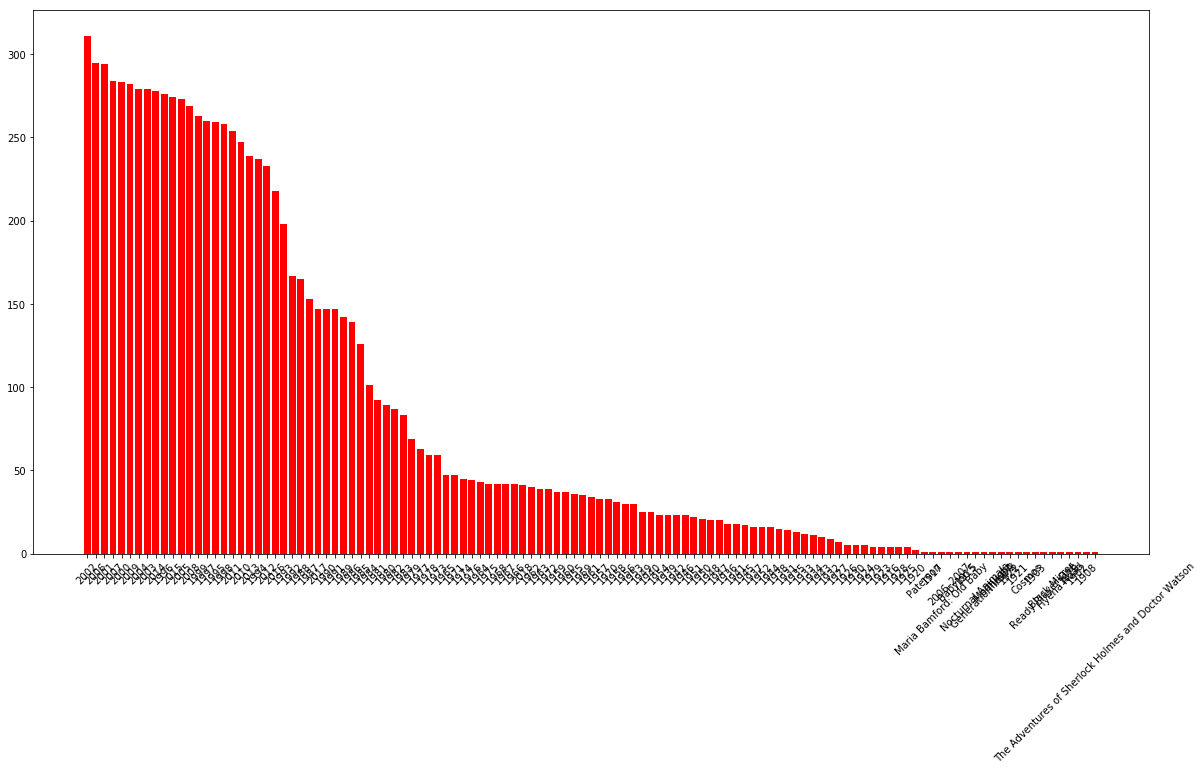

In [350]:
# write code here.
from pandas import DataFrame
import matplotlib.pyplot as plt

movie_numbers = pd.value_counts(movie.years)
movie_numbers = pd.DataFrame(movie_numbers)
movie_numbers = movie_numbers.reset_index()

movie_numbers['year'] = movie_numbers['index'] 
movie_numbers['count'] = movie_numbers['years']  
movie_numbers['years'] = movie_numbers['year'] 
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
plt.bar(movie_numbers['years'],movie_numbers['count'],color='red')

plt.show()

#More and more movies are being created as time goes by. 

# Q7.(1 point) Using matplotlib, plot total number of movies in different genres over the year. Plot should have proper title, axis labels and legends.

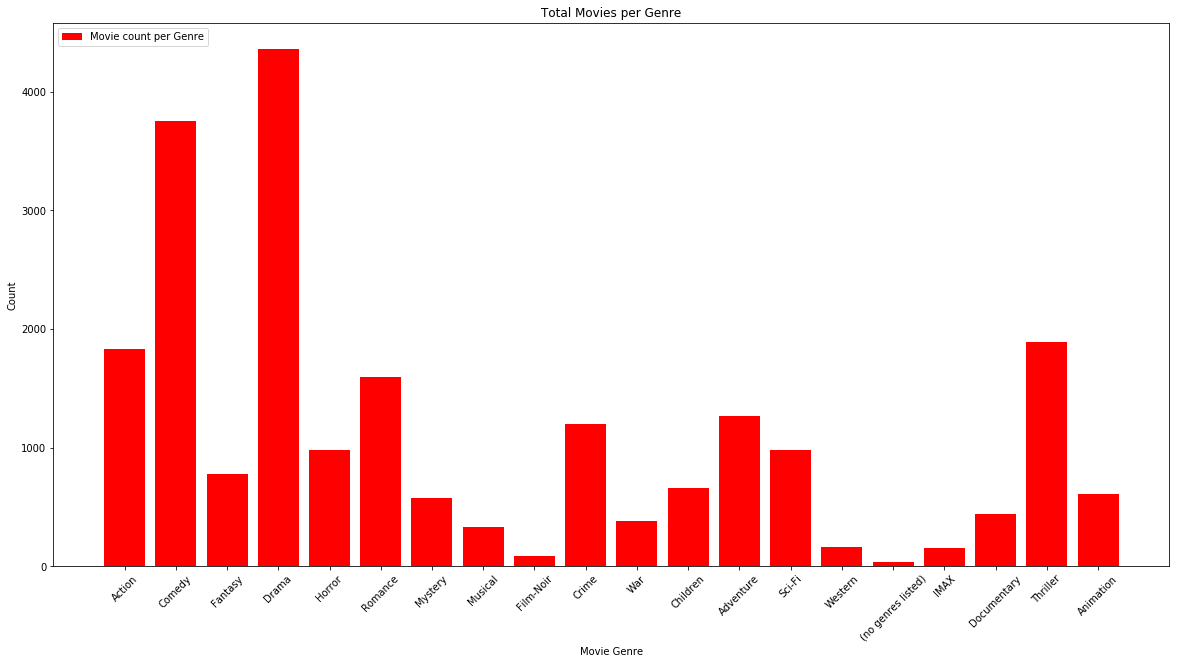

In [249]:

b = {}
for a in unique_genere:
    b[a]= sum(movie[a])
             
b


plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
plt.bar(list(b.keys()),list(b.values()),color='red')
plt.title('Total Movies per Genre')
plt.ylabel('Count')
plt.xlabel('Movie Genre')
plt.legend(['Movie count per Genre'], loc='upper left')
plt.show()


# Q 8 (.5 point) Build a *movie_title* column containing  the title of the movie(It should not contain year). Drop the original *title* columns. Display final movie dataFrame too.

In [263]:
 # write pandas code here
import re
movie_title = []
for c in movie['title']:
    movie_title.append(re.sub("[\(\[].*?[\)\]]", "", c))
movie['movie_title'] = movie_title
del movie['title']
movie

year  ýear                                       movie_title  movieId  \
0     1995  1995                                        Toy Story         1   
1     1995  1995                                          Jumanji         2   
2     1995  1995                                 Grumpier Old Men         3   
3     1995  1995                                Waiting to Exhale         4   
4     1995  1995                      Father of the Bride Part II         5   
5     1995  1995                                             Heat         6   
6     1995  1995                                          Sabrina         7   
7     1995  1995                                     Tom and Huck         8   
8     1995  1995                                     Sudden Death         9   
9     1995  1995                                        GoldenEye        10   
10    1995  1995                          American President, The        11   
11    1995  1995                      Dracula: Dead and Loving It        12   
12    1995  1995                                            Balto        13   
13    1995  1995                                            Nixon        14   
14    1995  1995                                 Cutthroat Island        15   
15    1995  1995                                           Casino        16   
16    1995  1995                            Sense and Sensibility        17   
17    1995  1995                                       Four Rooms        18   
18    1995  1995                   Ace Ventura: When Nature Calls        19   
19    1995  1995                                      Money Train        20   
20    1995  1995                                       Get Shorty        21   
21    1995  1995                                          Copycat        22   
22    1995  1995                                        Assassins        23   
23    1995  1995                                           Powder        24   
24    1995  1995                                Leaving Las Vegas        25   
25    1995  1995                                          Othello        26   
26    1995  1995                                     Now and Then        27   
27    1995  1995                                       Persuasion        28   
28    1995  1995                      City of Lost Children, The         29   
29    1995  1995                                  Shanghai Triad         30   
...    ...   ...                                               ...      ...   
9712  2018  2018                              Sorry to Bother You    188189   
9713  2018  2018                             Ant-Man and the Wasp    188301   
9714  2018  2018                                           Dogman    188675   
9715  2018  2018                     Mamma Mia: Here We Go Again!    188751   
9716  2018  2018                                              Tag    188797   
9717  2018  2018                   The Man Who Killed Don Quixote    188833   
9718  2018  2018                                       Boundaries    189043   
9719  2018  2018                                           Spiral    189111   
9720  2018  2018                    Mission: Impossible - Fallout    189333   
9721  2018  2018                                         SuperFly    189381   
9722  2010  2010                                     Iron Soldier    189547   
9723  2018  2018                                   BlacKkKlansman    189713   
9724  2018  2018                                The Darkest Minds    190183   
9725  2011  2011                                             Tilt    190207   
9726  2017  2017                      Jeff Ross Roasts the Border    190209   
9727  2015  2015                                        John From    190213   
9728  2017  2017                                     Liquid Truth    190215   
9729  1998  1998                                            Bunny    190219   
9730  2002  2002                               Hommage à

# Q 9(1 point) Using seaborn, plot average number of words in a movie name over the year in different genres. Write your observation in no more than 2 lines.

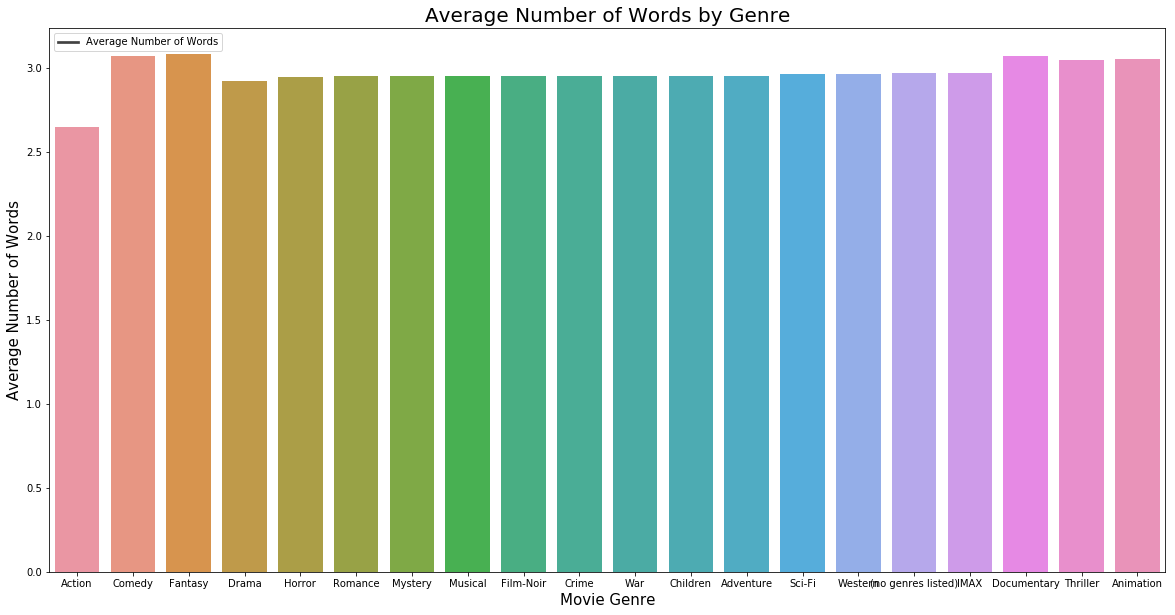

In [326]:
# Write code here.

Length = []
average = {}
for a in unique_genere:
    c = movie['genres'] == a
    #print(a)
    movie1 = movie[c]
    title_words = (movie1['movie_title'].str.split(' '))
    for b in title_words:
        #print(b)
        b = b[:-1]
        Length.append(len(b))
    ave = sum(Length)/len(Length)
    average[a] = ave

average = pd.DataFrame(list(average.items()),columns = ['Genre','Average Number of Words'])
average

import seaborn as sns
#sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,10))
ax = sns.barplot(x='Genre', y="Average Number of Words", data=average)
plt.title('Average Number of Words by Genre', size = 20.0)
plt.xlabel('Movie Genre', size = 15)
plt.ylabel('Average Number of Words', size = 15)
plt.legend(['Average Number of Words'], loc='upper left')
#The average number of words by Genre seem very consistent. They are all around 30 words. 